#Lab 4: Loss Functions & Optimization Basics

## Objective: Compare Cross-Entropy vs MSE and SGD vs Adam on MNIST classification





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with Loss: categorical_crossentropy, Optimizer: sgd
Test Accuracy: 0.9306

Training with Loss: categorical_crossentropy, Optimizer: adam
Test Accuracy: 0.9720

Training with Loss: mean_squared_error, Optimizer: sgd
Test Accuracy: 0.4611

Training with Loss: mean_squared_error, Optimizer: adam
Test Accuracy: 0.9709


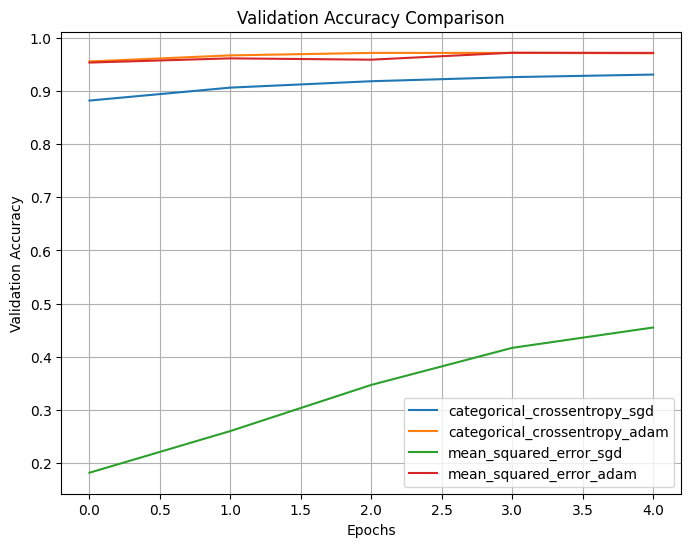

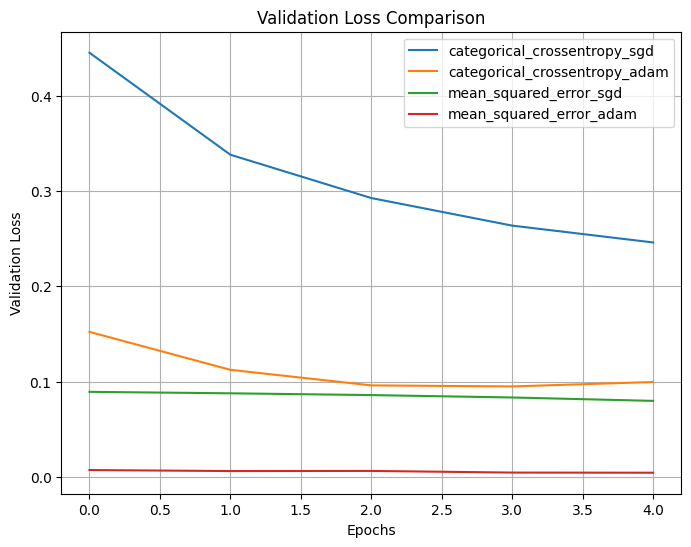


Final Test Accuracy Comparison:
categorical_crossentropy_sgd: 0.9306
categorical_crossentropy_adam: 0.9720
mean_squared_error_sgd: 0.4611
mean_squared_error_adam: 0.9709


In [ ]:

hhhhhhhhhhh

# Convert labels to one-hot for MSE
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# 2. Function to build MLP model
def build_mlp(loss_fn, optimizer, one_hot=False):
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer,
                  loss=loss_fn,
                  metrics=['accuracy'])
    return model

# 3. Configurations to test
configs = [
    ('categorical_crossentropy', 'sgd', True),
    ('categorical_crossentropy', 'adam', True),
    ('mean_squared_error', 'sgd', True),
    ('mean_squared_error', 'adam', True)
]

history_results = {}
test_results = {}

# 4. Train and evaluate each configuration
for loss_fn, opt, one_hot in configs:
    label_type = y_train_onehot if one_hot else y_train
    label_type_test = y_test_onehot if one_hot else y_test

    print(f"\nTraining with Loss: {loss_fn}, Optimizer: {opt}")
    model = build_mlp(loss_fn, opt, one_hot)
    history = model.fit(x_train, label_type,
                        validation_split=0.2,
                        epochs=5,  # keep short for lab time
                        batch_size=64,
                        verbose=0)
    history_results[f"{loss_fn}_{opt}"] = history.history
    test_loss, test_acc = model.evaluate(x_test, label_type_test, verbose=0)
    test_results[f"{loss_fn}_{opt}"] = test_acc
    print(f"Test Accuracy: {test_acc:.4f}")

# 5. Plot validation accuracy for each config
plt.figure(figsize=(8, 6))
for config, hist in history_results.items():
    plt.plot(hist['val_accuracy'], label=config)
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot validation loss for each config
plt.figure(figsize=(8, 6))
for config, hist in history_results.items():
    plt.plot(hist['val_loss'], label=config)
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# 7. Final accuracy comparison
print("\nFinal Test Accuracy Comparison:")
for config, acc in test_results.items():
    print(f"{config}: {acc:.4f}")
